# Entendimento do Problema

Objetivo do Problema:
- 1.0. Previsao do primeiro destino que um novo usuário irá escolher.
    - Porque?
    - Qual tipo de modelo de negócio do Airbnb?
        - Marketplace (Conectar pessoas que oferecem acomodacao, com pessoas que estao procurando acomodacao)
        - Oferta (pessoas oferecendo acomodacao)
            - Tamanho do portfólio.
            - Diversidade/Densidade de Portfólio.
            - Preco Medio
            
        - Demanda (pessoas procurando acomodacao)
            - Numero de Usuários
            - LTV (Lifetime Value)
            - CAC (Client Acquisition Cost)
            
            
           Gross Revenue = (Fee*Numero cliente) - CAC 

- Proposta da Solucao
- Modelo de Predivao do primeiro destino de um novo usario.
- 1.0. Predicoes e salva em tabela do banco de dados. 
- 2.0. API 
    - Input: usuario e suas caracteristicas
    - Output: usuario e suas caracteristicas com a **predicao do destino**

# 0.0 Imports

In [24]:
import pandas as pd
import numpy as np
import random
from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import metrics         as m
from scikitplot import metrics      as mt

from keras import models as ml
from keras import layers as l

##  0.1. Helper Functions

##  0.2. Carregando dados

In [3]:
df_raw = pd.read_csv('../dados/train_users_2.csv', low_memory=True)

# 1.0. Descrição dos Dados

In [4]:
df1 = df_raw.copy()

print('Número de Linhas: {}'.format(df1.shape[0]))
print('Número de Colunas: {}'.format(df1.shape[1]))

Número de Linhas: 213451
Número de Colunas: 16


##  1.1. Tipo Dados

In [5]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.2. Check NA

In [6]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [7]:
# Neste primeiro ciclo vou remover os NA e nos proximos voltarei para tratar
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.3. Mudando dTyepes

In [8]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [9]:
 # date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

# age
df1['age'] = df1['age'].astype(int)

## 1.4. Valida Balanceamento

In [10]:
df1['country_destination'].value_counts(normalize=True) * 100

US       70.886447
other    11.085359
FR        5.408458
IT        2.976339
GB        2.593478
ES        2.486395
CA        1.569582
DE        1.245398
NL        0.880140
AU        0.636634
PT        0.231770
Name: country_destination, dtype: float64

# 2.0. Filtragem Dados

In [11]:
df2 = df1.copy()

## 2.1. Filtragem Linhas

## 2.2. Seleção Colunas

# 3.0. Preparação Dados

In [12]:
df3 = df2.copy()
df3.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


In [13]:
df3_dummy = pd.get_dummies(df3.drop(['id', 'country_destination'], axis=1))
df3_dummy.head()

,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,2010-09-28,2009-06-09 23:12:47,2010-08-02,56,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2011-12-05,2009-10-31 06:01:29,2012-09-08,42,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-09-14,2009-12-08 06:11:05,2010-02-18,41,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2010-01-02,2010-01-02 01:25:58,2010-01-05,46,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7,2010-01-03,2010-01-03 19:19:05,2010-01-13,47,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [14]:
df3 = pd.concat([df3[['id', 'country_destination']], df3_dummy], axis=1) 
df3.head()

,id,country_destination,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,4ft3gnwmtx,US,2010-09-28,2009-06-09 23:12:47,2010-08-02,56,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,other,2011-12-05,2009-10-31 06:01:29,2012-09-08,42,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,US,2010-09-14,2009-12-08 06:11:05,2010-02-18,41,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,US,2010-01-02,2010-01-02 01:25:58,2010-01-05,46,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0d01nltbrs,US,2010-01-03,2010-01-03 19:19:05,2010-01-13,47,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# 4.0. Seleção Features

In [15]:
# Remove datas originais pois é inútil para o modelo.
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']

df4 = df3.drop(cols_drop, axis=1)

X = df4.drop('country_destination', axis=1)
y = df4['country_destination'].copy()

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

# 5.0. Machine Learning

In [16]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

## 5.1. Baseline 

In [17]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
country_destination_weights = df1['country_destination'].value_counts(normalize=True).sort_index().tolist()

yhat_random = random.choices(population=country_destination_list,  
                             weights=country_destination_weights,
                             k=k_num)
len(yhat_random)

13635

### 5.1.1 Baseline Performance

Accuracy: 0.5197653098643198
Balanced Accuracy:0.09217894237998317
Kappa Score: -0.004718979817828872
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        90
          CA       0.02      0.02      0.02       210
          DE       0.02      0.02      0.02       176
          ES       0.02      0.02      0.02       344
          FR       0.05      0.04      0.05       742
          GB       0.04      0.05      0.05       356
          IT       0.03      0.03      0.03       399
          NL       0.02      0.02      0.02       107
          PT       0.00      0.00      0.00        26
          US       0.71      0.71      0.71      9704
       other       0.10      0.11      0.11      1481

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.52      0.52     13635



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

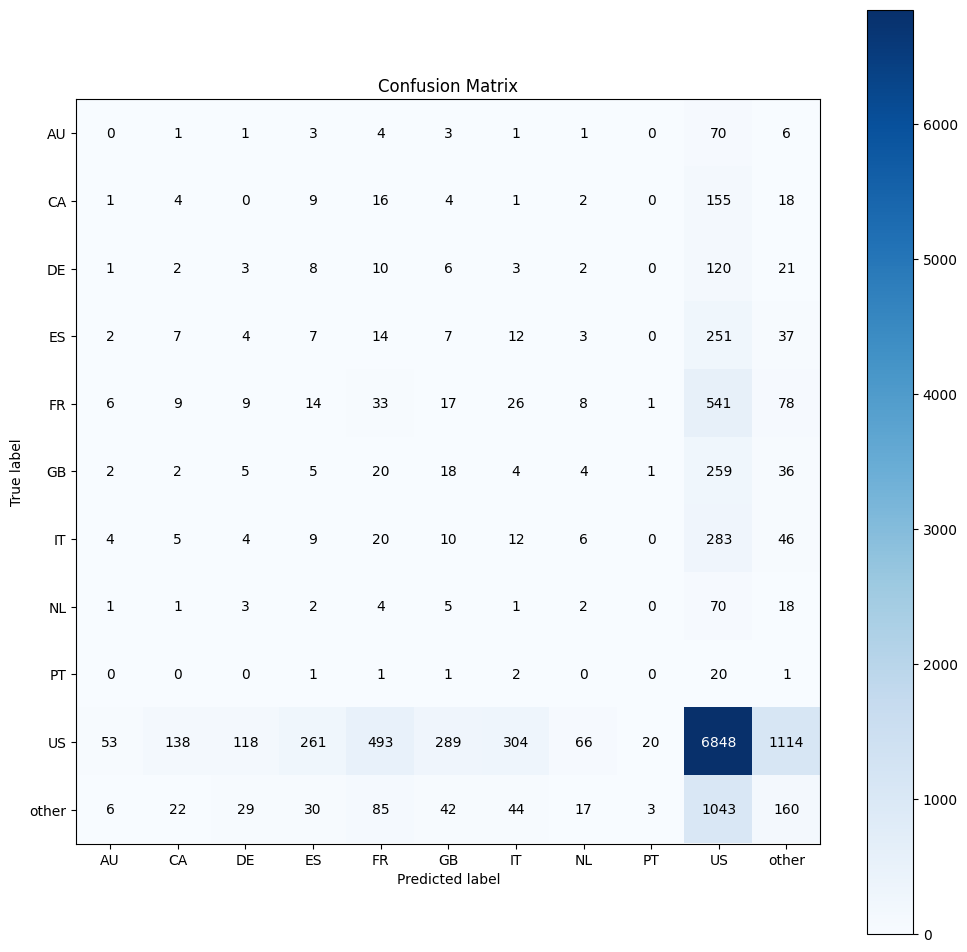

In [18]:
# Accuracy
acc_random = m.accuracy_score(y_test, yhat_random)
print('Accuracy: {}'.format(acc_random))

# Balanced Accuray
balanced_acc_random = m.balanced_accuracy_score(y_test, yhat_random)
print('Balanced Accuracy:{}'.format(balanced_acc_random))

# Kappa Metrics
kappa_random = m.cohen_kappa_score(y_test, yhat_random)
print('Kappa Score: {}'.format(kappa_random))

# Classification report
print(m.classification_report(y_test, yhat_random))

# Confusion Matrix
mt.plot_confusion_matrix(y_test, yhat_random, normalize=False, figsize=(12,12))

## 5.2. Neural Network MLP

In [19]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

# Definição Modelo
model = ml.Sequential()
model.add(l.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(l.Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Treino
model.fit(x_train, y_train_nn, epochs=100, verbose=True)

Epoch 1/100
1705/1705 [==============================] - 2s 919us/step - loss: 1.3470 - accuracy: 0.7031
Epoch 2/100
1705/1705 [==============================] - 2s 908us/step - loss: 1.2648 - accuracy: 0.7064
Epoch 3/100
1705/1705 [==============================] - 2s 942us/step - loss: 1.2272 - accuracy: 0.7068
Epoch 4/100
1705/1705 [==============================] - 2s 914us/step - loss: 1.2032 - accuracy: 0.7069
Epoch 5/100
1705/1705 [==============================] - 2s 952us/step - loss: 1.1908 - accuracy: 0.7070
Epoch 6/100
1705/1705 [==============================] - 2s 944us/step - loss: 1.1837 - accuracy: 0.7070
Epoch 7/100
1705/1705 [==============================] - 2s 929us/step - loss: 1.1645 - accuracy: 0.7072
Epoch 8/100
1705/1705 [==============================] - 2s 924us/step - loss: 1.1587 - accuracy: 0.7070
Epoch 9/100
1705/1705 [==============================] - 2s 887us/step - loss: 1.1502 - accuracy: 0.7072
Epoch 10/100
1705/1705 [==============================]

### 5.2.1 NN Performance

In [20]:
# Predição
pred_nn = model.predict(x_test)

# Inverte predição
yhat_nn = ohe.inverse_transform(pred_nn)

y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

427/427 [==============================] - 0s 602us/step


Acurácia: 0.7094976164283096
Balanced Accuracy:0.09153183873284591
Kappa Score: 0.004007337133695277


g:\projetos\cds\previsao_agendamento_acomodacao\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\projetos\cds\previsao_agendamento_acomodacao\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\projetos\cds\previsao_agendamento_acomodacao\.venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        90
          CA       0.00      0.00      0.00       210
          DE       0.00      0.00      0.00       176
          ES       0.00      0.00      0.00       344
          FR       0.25      0.00      0.00       742
          GB       0.00      0.00      0.00       356
          IT       0.10      0.00      0.00       399
          NL       0.00      0.00      0.00       107
          PT       0.00      0.00      0.00        26
          US       0.71      1.00      0.83      9704
       other       0.22      0.01      0.01      1481

    accuracy                           0.71     13635
   macro avg       0.12      0.09      0.08     13635
weighted avg       0.55      0.71      0.59     13635



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

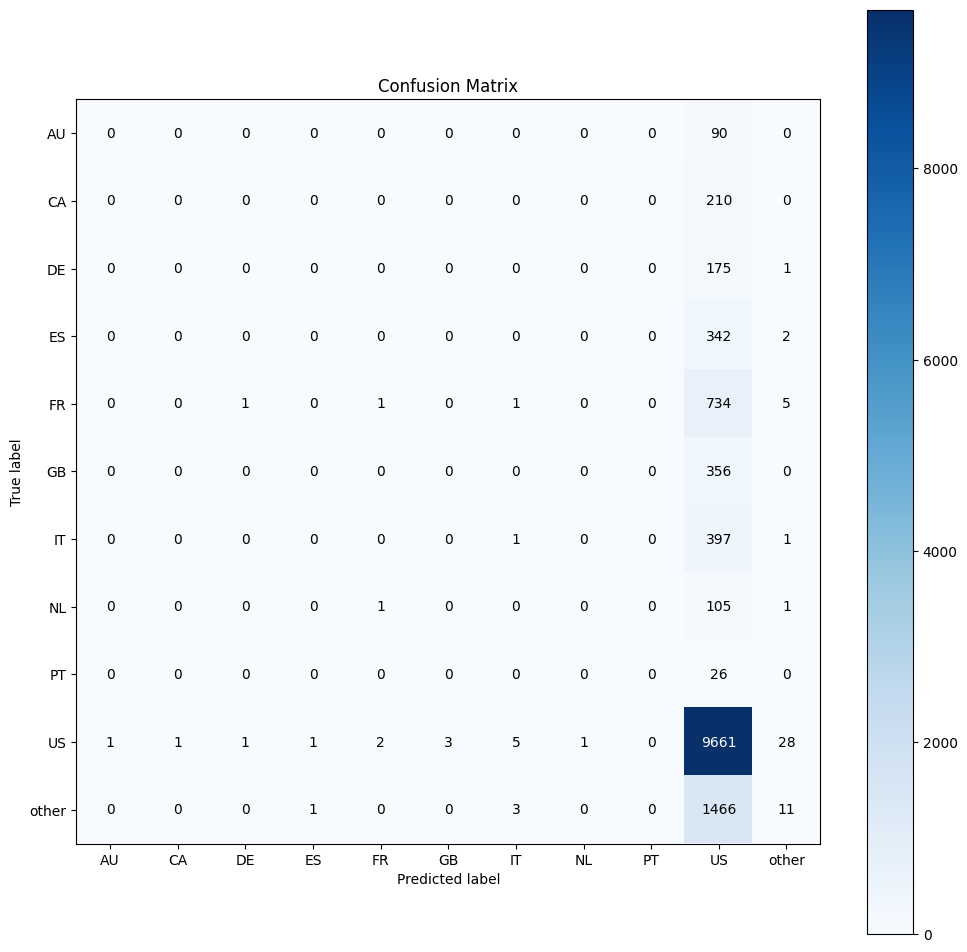

In [21]:
# Acurácia
acc_nn =m.accuracy_score(y_test_nn, yhat_nn)
print(f'Acurácia: {acc_nn}')

# Balanced Accuray
balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
print('Balanced Accuracy:{}'.format(balanced_acc_nn))

# Kappa
kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
print('Kappa Score: {}'.format(kappa_nn))

# Classification report
print(m.classification_report(y_test_nn, yhat_nn))

# Matriz de Confusão
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(12,12))

### 5.2.1 NN Performance - Cross-Validation

In [23]:
num_folds = 5
kfold = ms.StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

balanced_acc_list = []
kappa_acc_list = []

i = 1
for train_ix, val_ix in kfold.split(x_train, y_train):
    print(f'Fold {i}/{num_folds}')

    # get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]

    # target hot-encoding
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform(y_train_fold.values.reshape(-1, 1)).toarray()

    # Definição Modelo
    model = ml.Sequential()
    model.add(l.Dense(256, input_dim=x_train.shape[1], activation='relu'))
    model.add(l.Dense(11, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Treino modelo
    model.fit(x_train_fold, y_train_fold_nn, epochs=100, batch_size=32, verbose=0)

    # Predição
    pred_nn = model.predict(x_val_fold)
    yhat_nn = ohe.inverse_transform(pred_nn)
    
    # Ajusta os dados com reshape
    y_test_nn = y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape(1, -1)[0]

    # Métricas
    ## Balanced Accuracy 
    balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
    balanced_acc_list.append(balanced_acc_nn)
    
    ## Kappa Metrics
    kappa_acc_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
    kappa_acc_list.append(kappa_acc_nn)
    
    i += 1   


Fold 1, 5
341/341 [==============================] - 0s 723us/step
Fold 2, 5
341/341 [==============================] - 0s 696us/step
Fold 3, 5
341/341 [==============================] - 0s 708us/step
Fold 4, 5
341/341 [==============================] - 0s 719us/step
Fold 5, 5
341/341 [==============================] - 0s 685us/step


In [25]:
print('Avg Balanced Accuracy: {} +/- {}'.format(np.round(np.mean(balanced_acc_list), 2), 
                                                  np.round(np.std(balanced_acc_list ), 4)))
print('Avg Kappa: {} +/- {}'.format(np.round(np.mean(kappa_acc_list), 4), 
                                      np.round(np.std(kappa_acc_list), 4)))

Avg Balanced Accuracy: 0.09 +/- 0.0003
Avg Kappa: 0.003 +/- 0.0018
